# Matrix decomposition

### Problem 0

Generate random matrix of a reasonable size, perform SVD decomposition, obtain initial matrix from it, calculate the error.

In [1]:
import numpy as np
import scipy.linalg as la

In [3]:
A = np.random.random((10,10))
print(A)

[[0.59460948 0.87786022 0.54127767 0.21517115 0.39071848 0.95848879
  0.66600926 0.19624572 0.29638323 0.85193108]
 [0.67316499 0.60908172 0.30566525 0.16978612 0.8948759  0.92851531
  0.13684277 0.83228522 0.92056886 0.88907229]
 [0.54052857 0.3089445  0.40522739 0.32755402 0.93138617 0.02659174
  0.07781513 0.64172377 0.97937541 0.35572367]
 [0.70976208 0.17552887 0.71151371 0.95277334 0.8218428  0.18659335
  0.89208003 0.60574778 0.62651245 0.06596799]
 [0.2106938  0.17580401 0.12916724 0.37942433 0.83415253 0.72706111
  0.1642138  0.39002196 0.25171207 0.0333385 ]
 [0.97484961 0.14263661 0.74246532 0.33751777 0.88793778 0.31227128
  0.39502691 0.90279873 0.49988203 0.93965109]
 [0.45953152 0.55179106 0.21566739 0.40712971 0.05732511 0.95662274
  0.52160008 0.96123266 0.1946567  0.76067137]
 [0.99479452 0.37188623 0.68721134 0.7612817  0.843325   0.99330568
  0.79751191 0.94244428 0.57717128 0.61131597]
 [0.07408443 0.60617085 0.71184024 0.89086055 0.94886117 0.08653262
  0.04158006

In [5]:
U, S, Vh = la.svd(A)
print(U.shape)
print(S.shape)
print(Vh.shape)

(10, 10)
(10,)
(10, 10)


In [8]:
B = U @ np.diag(S) @ Vh

In [9]:
D = np.abs(A-B)
print(D.max())

2.831068712794149e-15


### Problem 1
Load *rocket* image from scikit-image library (make sure you're working with normalized pixel values):

`from skimage import data
from skimage.color import rgb2gray
img = data.rocket()
gr_img = rgb2gray(img)`

Perform SVD decomposition, try restoring the image with $1, 2, \ldots, k$ singular vectors, check at which $k$ the restored result is reasonably good. Calculate the reduction in necessary storage for the image compared to the original image. Then try performing the same process with colored version separately for each channel (same $k$ for every channel, different $k$ for every channels). Try the same for *chelsea* image: which image takes more data to restore to the tolerable quality?

In [12]:
#matplotlib inline
import matplotlib.pyplot as plt
from skimage import data
from skimage.color import rgb2gray
img = data.rocket()
gr_img = rgb2gray(img)

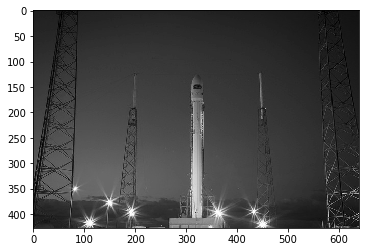

In [18]:
plt.imshow(gr_img, cmap='gray')
plt.show()

In [24]:
U, S, Vh = la.svd(gr_img, full_matrices=False)
print(U.shape)
print(S.shape)
print(Vh.shape)

(427, 427)
(427,)
(427, 640)


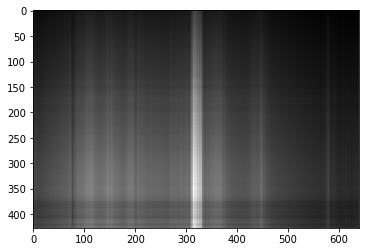

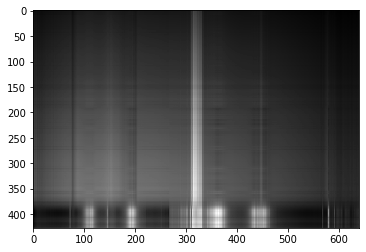

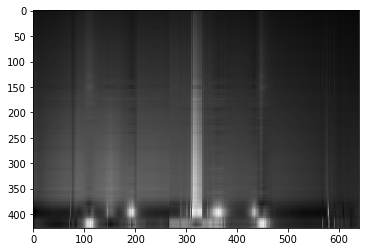

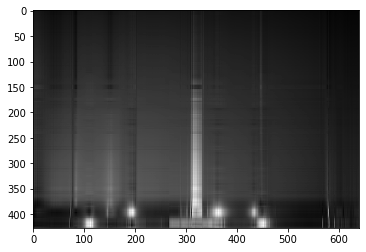

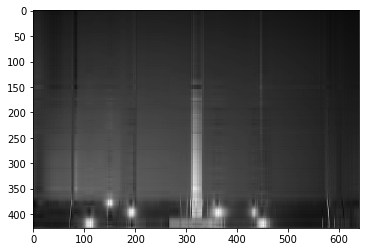

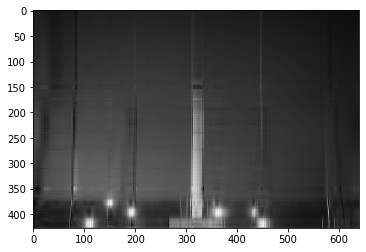

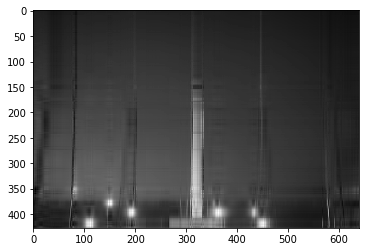

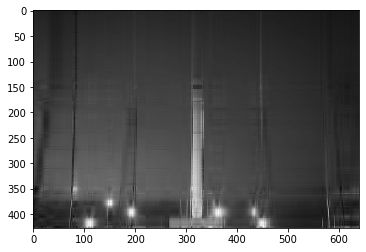

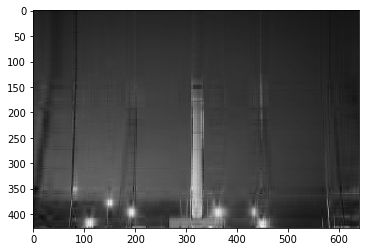

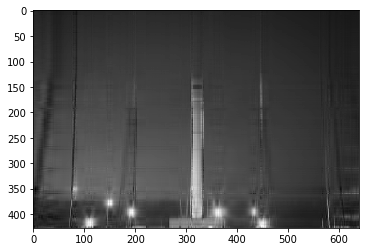

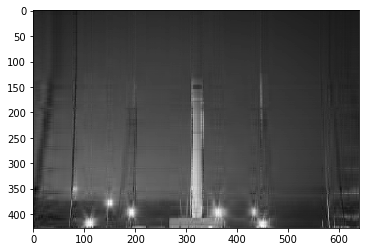

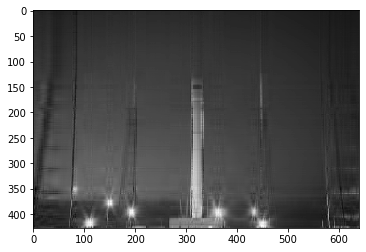

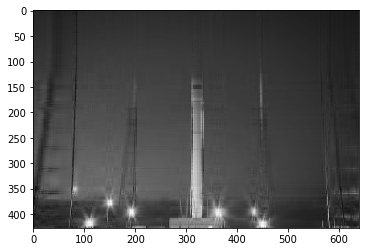

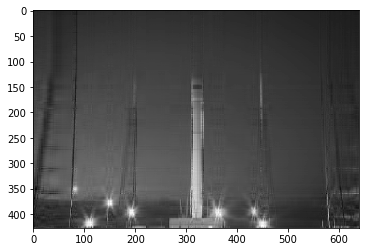

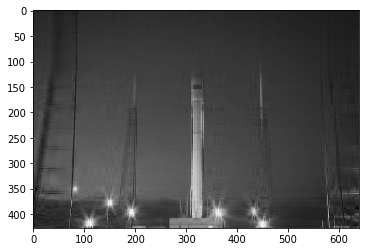

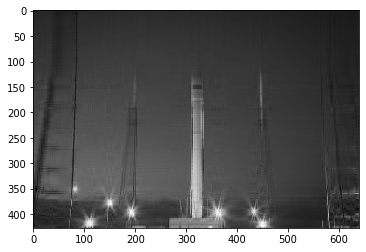

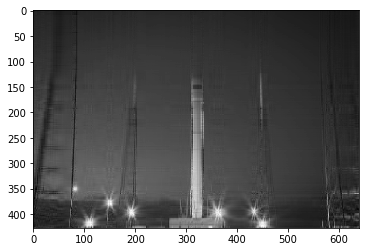

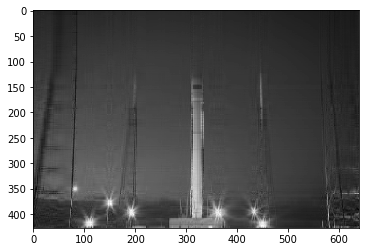

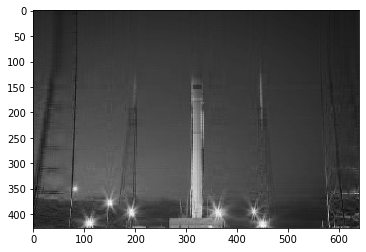

In [27]:
for k in range(1, 20):
    S1 = np.zeros(S.shape)
    S1[:k] = S[0:k]
    B = U @ np.diag(S1) @ Vh
    plt.imshow(B, cmap='gray')
    plt.show()

In [28]:
# выводим размер изображения в пикселях
print(img.shape[0]*img.shape[1])

273280


In [31]:
# выводим степень "сжатия" изображения:
# делим размер исходного изображения на размеры матриц для хранения  SVD разложения
print(img.shape[0]*img.shape[1]/(20*img.shape[0] + 20*img.shape[1]+20))

12.794007490636703


### Problem 2
Load *digits* dataset:

`from sklearn.datasets import load_digits
digits = load_digits()`

Perform SVD on the data, inspect the singular values, try reconstructing the data with some fixed number of singular vectors, check the visual quality of the reconstruted samples. Try the same with a subset of images corresponding to a specific digit of your choice - how many singular vectors you need for similar quality of reconstriction?